Task1

IMPORT LIBRARIES

In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The Data

In [516]:
data=pd.read_csv(r'C:\Users\Lenovo\Downloads\Dataset(1).csv')

In [437]:
data.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no


LEVEL 1

Histogram of features

Feature 1

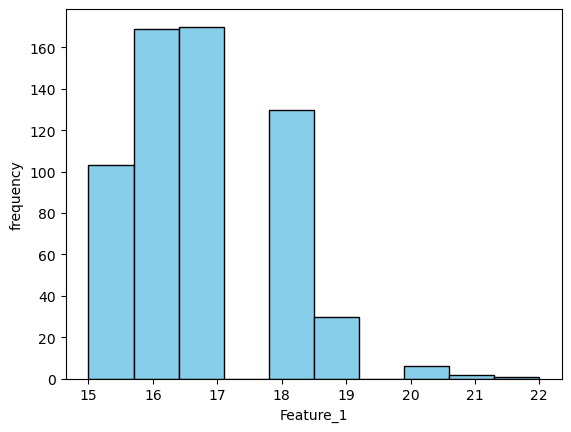

In [441]:
plt.hist(data['Feature_1'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Feature_1')
plt.ylabel('frequency')
plt.show()


The above histogram describe that data is more or less consistent in group(15-18) , that could describe the age group of 
fist, second and so on year student.

In [444]:
m1= data['Feature_1'].mean()
print("Mean:", m1)

m2=data['Feature_1'].mode()[0]
print("Mode:",m2)
m3=data['Feature_1'].median()
print("Median:",m3)
m4=data['Feature_1'].max()
m5=data['Feature_1'].min()
print("Max:",m4)
print("Min:",m5)

Mean: 16.74795417348609
Mode: 17.0
Median: 17.0
Max: 22.0
Min: 15.0


mean,mode , median are all around 17 which could easily be relatable to age of college student.Morever max and min values are 
clearly relate to age group of college students.

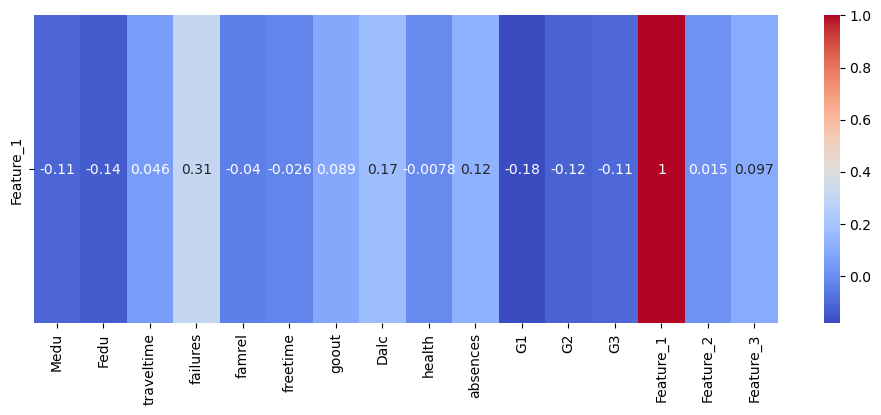

In [447]:
co1=data.corr(numeric_only=True)['Feature_1']
#transpose for a single-row heatmap
plt.figure(figsize=(12,4))
co1T = co1.to_frame().T
sns.heatmap(co1T,annot=True,cmap='coolwarm')
plt.show()

the above correlation describe that feature 1 does not have a strong coorelation wih other variables like absecen,goout.Similrly age does 
does not have strong correlation with academic scores etc.

Feaature 1=age

FEATURE 2


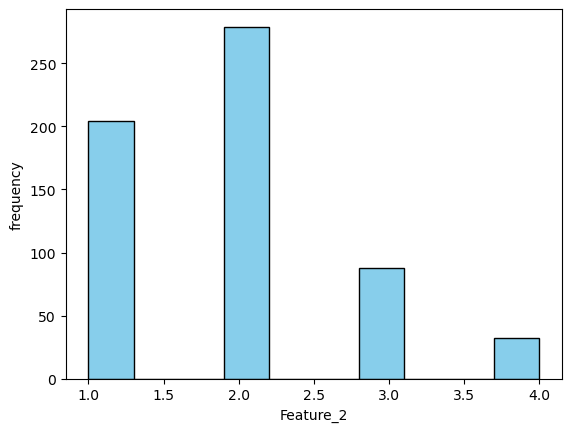

In [452]:
plt.hist(data['Feature_2'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Feature_2')
plt.ylabel('frequency')
plt.show()

the above histogram suggest that feature 2 is a categorical variable.so ,it could be year of stud,studytime etc.

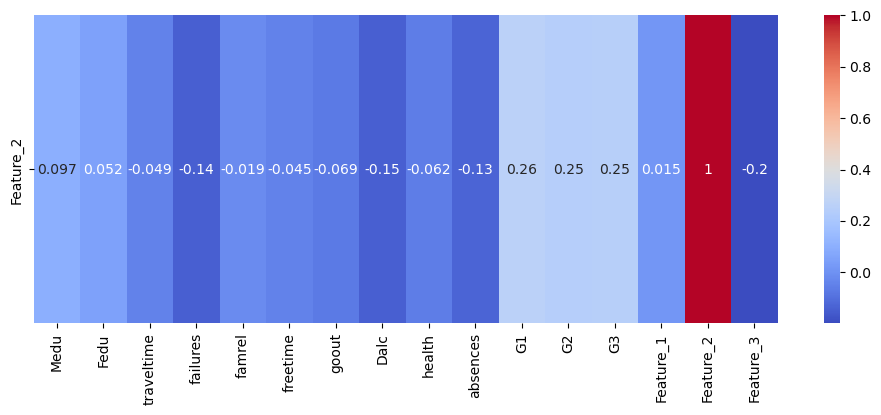

In [455]:
co1=data.corr(numeric_only=True)['Feature_2']
#transpose for a single-row heatmap
plt.figure(figsize=(12,4))
co1T = co1.to_frame().T
sns.heatmap(co1T,annot=True,cmap='coolwarm')
plt.show()

corelation suggest that it has a mild relation with grades so , it wmay link to academic success. so, it could be studytime.
why not year of study? as it has weak coorelation with age group (feature 1).

In [458]:
cb = pd.crosstab(data['Feature_1'], data['Feature_2'],margins=True)

print(cb)

Feature_2  1.0  2.0  3.0  4.0  All
Feature_1                         
15.0        33   42   12    7   94
16.0        56   72   18    8  154
17.0        58   72   26    6  162
18.0        31   64   21    5  121
19.0        11   12    5    1   29
20.0         3    2    1    0    6
21.0         0    1    1    0    2
22.0         1    0    0    0    1
All        193  265   84   27  569


In [460]:
m1= data['Feature_2'].mean()
print("Mean:", m1)

m2=data['Feature_2'].mode()[0]
print("Mode:",m2)
m3=data['Feature_2'].median()
print("Median:",m3)
m4=data['Feature_2'].max()
m5=data['Feature_2'].min()
print("Max:",m4)
print("Min:",m5)

Mean: 1.913764510779436
Mode: 2.0
Median: 2.0
Max: 4.0
Min: 1.0


mode is 2.0 which is easely relatible to what most of students have study time in index(1-4).

Feaature 2= study time

Feature 3


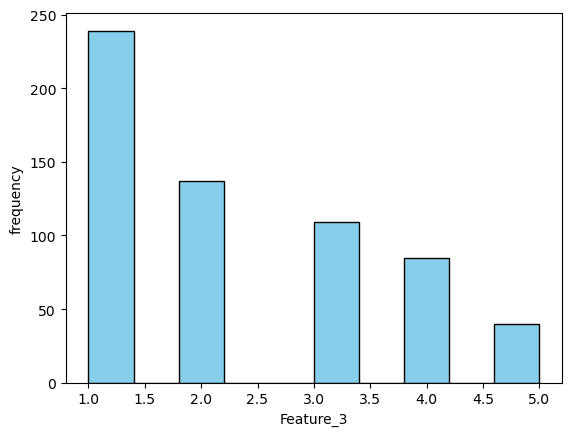

In [465]:
plt.hist(data['Feature_3'], color='skyblue', edgecolor='black')
plt.xlabel('Feature_3')
plt.ylabel('frequency')
plt.show()

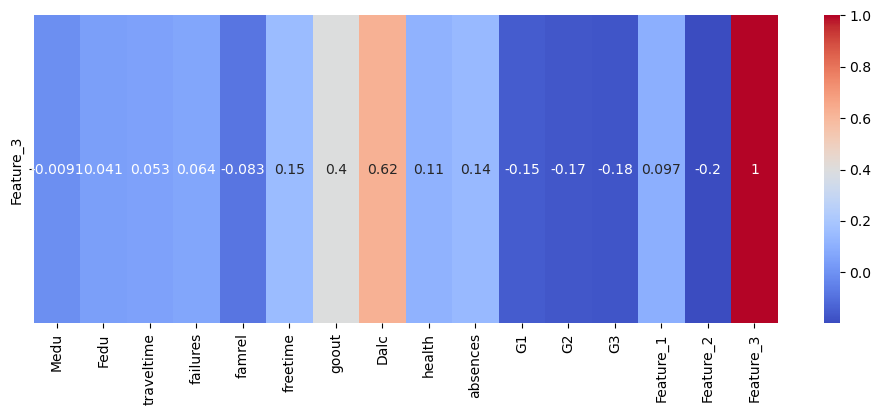

In [467]:
co1=data.corr(numeric_only=True)['Feature_3']
#transpose for a single-row heatmap
plt.figure(figsize=(12,4))
co1T = co1.to_frame().T
sns.heatmap(co1T,annot=True,cmap='coolwarm')
plt.show()

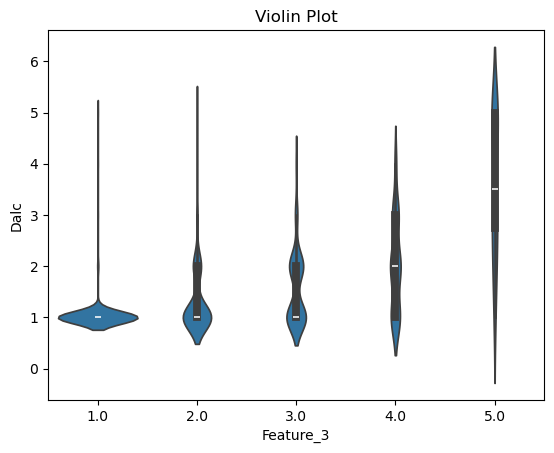

In [799]:
sns.violinplot(x='Feature_3', y='Dalc', data=data)
plt.title('Violin Plot')
plt.show()

so less the Feature_3 is, less Dalc is.

high correlation with deal(alcohal consumption per day) and with goout suggest that 

so,it could be either weekly alcohal consumption or no of friends in group.

so,it could be net alcohal consumption or weekly alcohal consumption
Feature_3='Weakly alcohal consumption'

LEVEL 2

Cleaning DATA

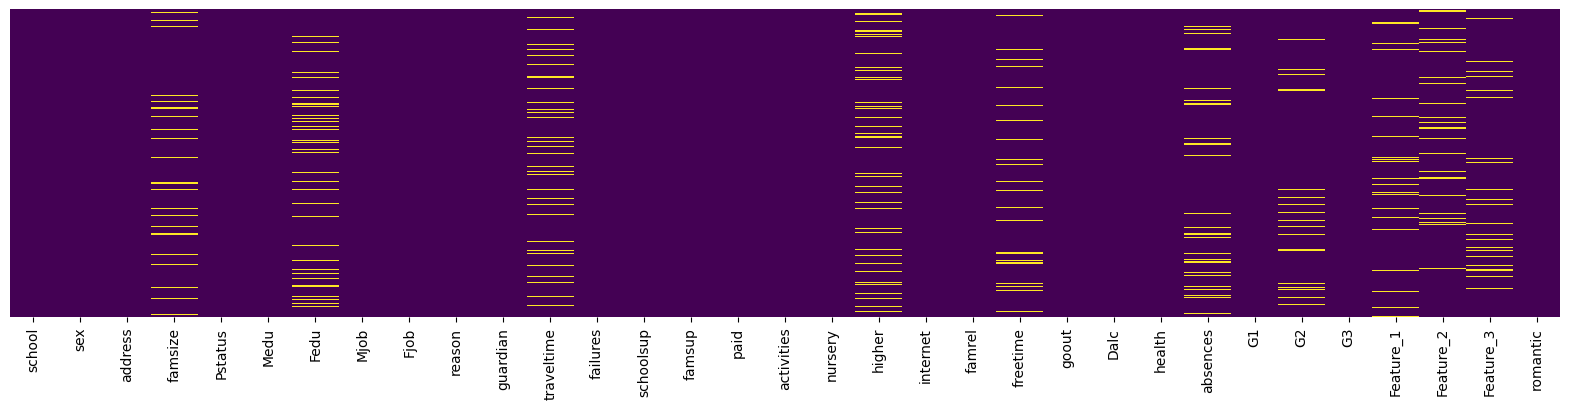

In [474]:
plt.figure(figsize=(20,4))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

so, above graph suggest that famsize,fedu,traveltime,higher,absecnces,g1,g2,g3,feature 1,feature 2, feature 3 are having missing data

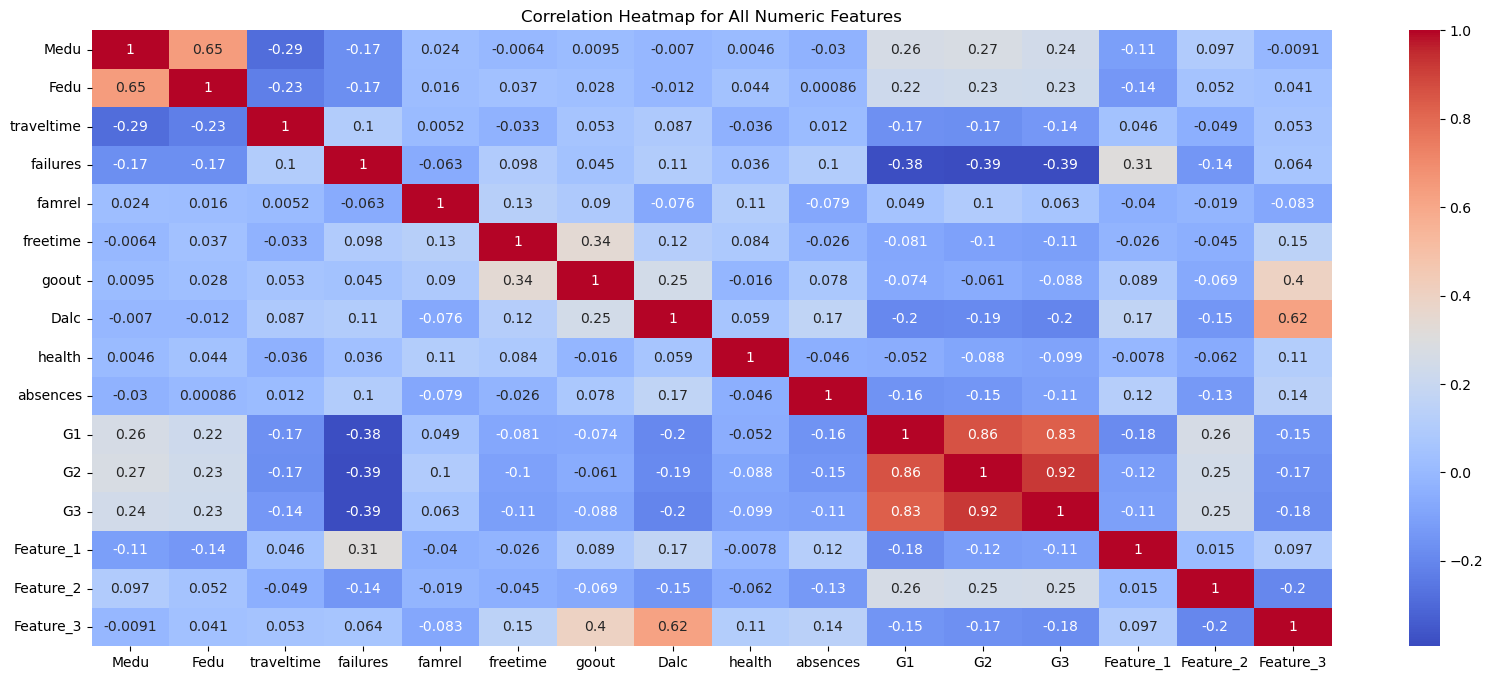

In [477]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for All Numeric Features')
plt.show()

Most of thefeature do not have strong correlation. so we use mean,mode,median to replace null values.
For famsize,higher are categorical features therefore mode is preferred, while fedu and traveltime are numerical features
so, median is preferred.

In [533]:
mfam = data['famsize'].mode()[0]
data['famsize'] = data['famsize'].fillna(mfam)
mt = data['higher'].mode()[0]
data['higher'] = data['higher'].fillna(mt)
mefe = data['traveltime'].median() 
data['traveltime'] = data['traveltime'].fillna(mefe)
mfedu = data['Fedu'].median() 
data['Fedu'] = data['Fedu'].fillna(mfedu)


In [525]:
mfam = data['G2'].median()
data['G2'] = data['G2'].fillna(mfam)
mt = data['Feature_3'].median()
data['Feature_3'] = data['Feature_3'].fillna(mt)


In [529]:
mefe = data['Feature_1'].median() 
data['Feature_1'] = data['Feature_1'].fillna(mefe)
mfedu = data['Feature_2'].median() 
data['Feature_2'] = data['Feature_2'].fillna(mfedu)
mefe = data['absences'].median() 
data['absences'] = data['absences'].fillna(mefe)
mfedu = data['freetime'].median() 
data['freetime'] = data['freetime'].fillna(mfedu)

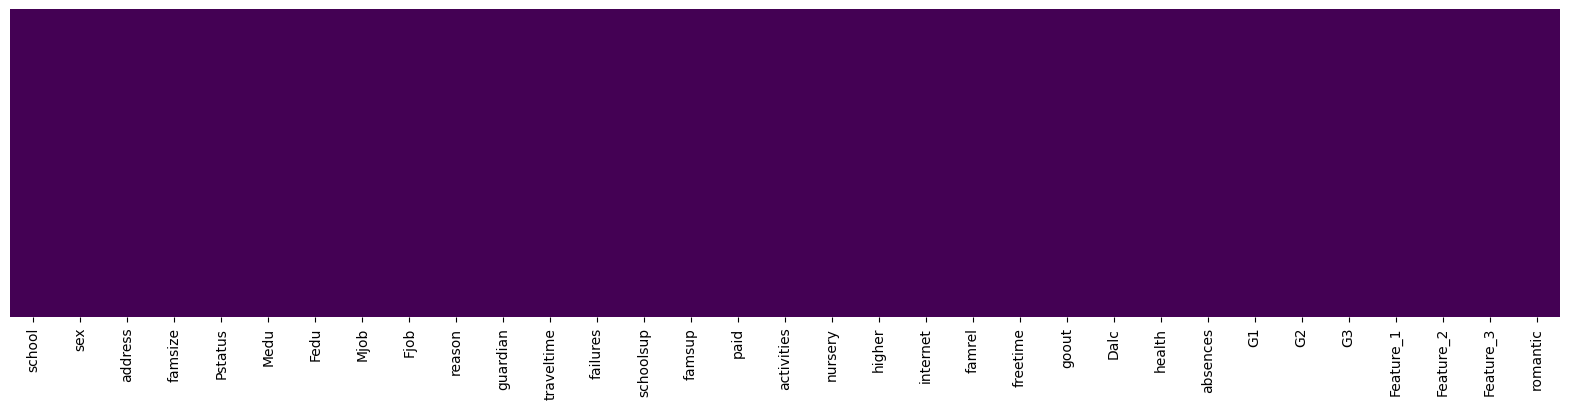

In [590]:
plt.figure(figsize=(20,4))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

QUESTIONS-

Does alcohal consumption vary by gender?

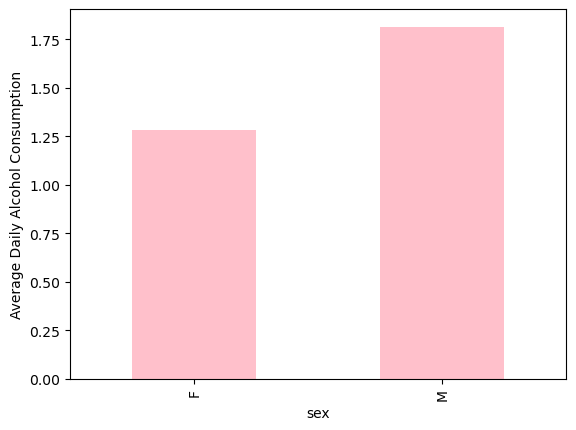

In [343]:
ba=data.groupby('sex')['Dalc'].mean()
ba.plot(kind='bar',color='pink')


plt.xlabel('sex')
plt.ylabel('Average Daily Alcohol Consumption')
plt.show()

Males have higher daily alcohal consumption.

How family relation affect alcohal consumption.

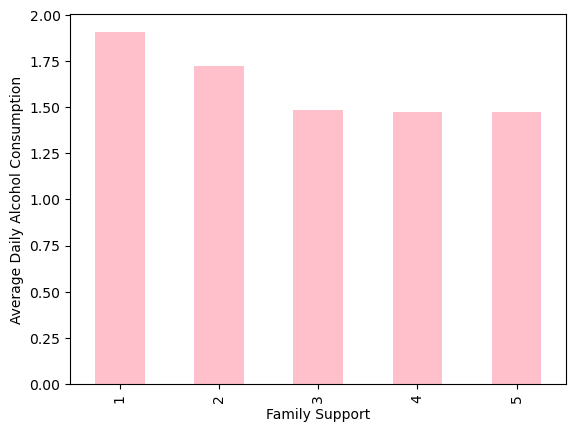

In [73]:
ba=data.groupby('famrel')['Dalc'].mean()
ba.plot(kind='bar',color='pink')


plt.xlabel('Family Support')
plt.ylabel('Average Daily Alcohol Consumption')
plt.show()

Good family relation have lower alcohal consumption and vice versa

HOW STUDY TIME AFFECT GRADES

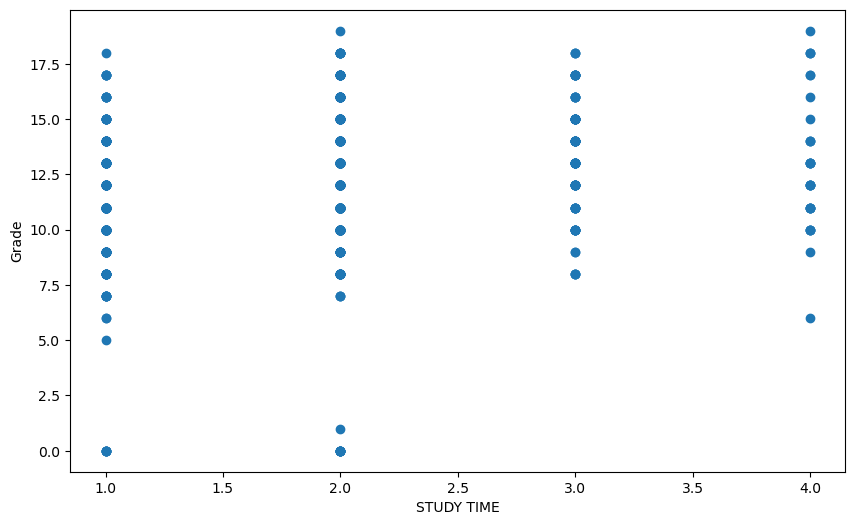

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(data['Feature_2'], data['G3'])
plt.xlabel('STUDY TIME')
plt.ylabel('Grade')
plt.show()

HIGH STUDY TIME HAVE HIGHER GRADES

HOW DOES HEALTH AFFECT ABSENCES?

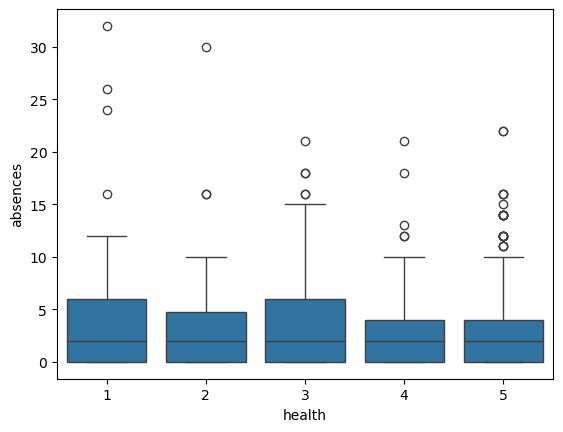

In [84]:

sns.boxplot(x='health', y='absences', data=data)
plt.show()

In [86]:
summary = data.groupby('health')['absences'].describe()
print(summary)

        count      mean       std  min  25%  50%   75%   max
health                                                      
1        90.0  4.111111  5.577734  0.0  0.0  2.0  6.00  32.0
2        78.0  3.448718  4.681124  0.0  0.0  2.0  4.75  30.0
3       124.0  3.879032  4.520221  0.0  0.0  2.0  6.00  21.0
4       108.0  3.212963  4.062712  0.0  0.0  2.0  4.00  21.0
5       249.0  3.389558  4.193511  0.0  0.0  2.0  4.00  22.0


most of the good health students have less absences

how family support affect pursuit of high education

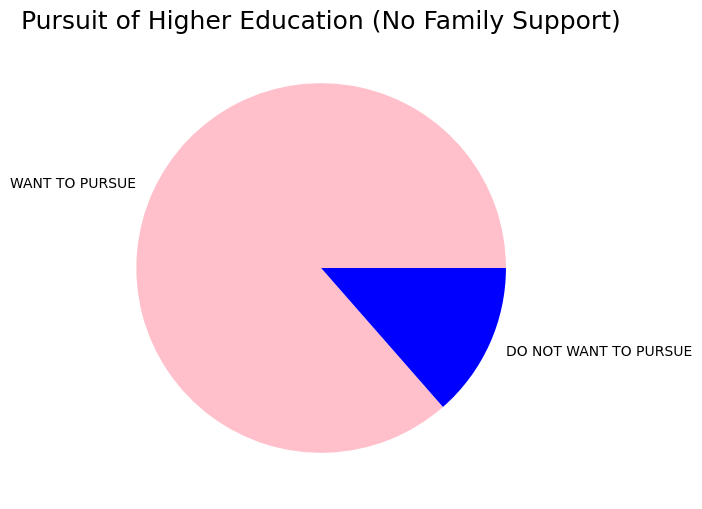

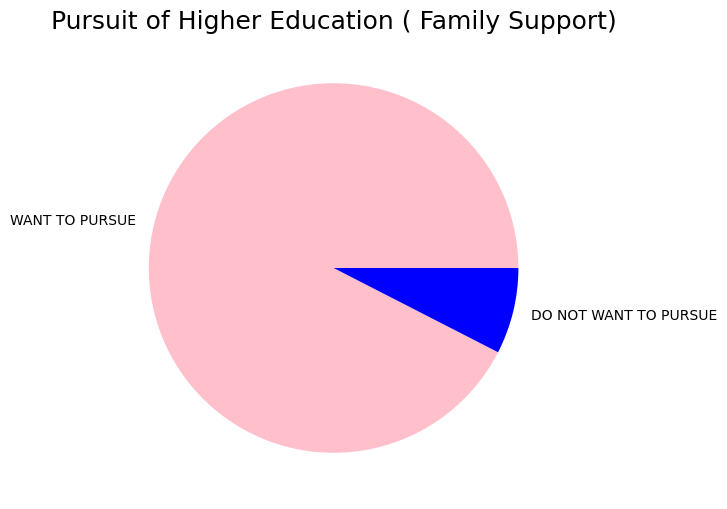

In [90]:

no=data[data['famsup']=='no']
pur=no['higher'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(pur,labels=['WANT TO PURSUE','DO NOT WANT TO PURSUE'],colors=['pink','blue'])

plt.title('Pursuit of Higher Education (No Family Support)', fontsize=18)
plt.show()
no=data[data['famsup']=='yes']
pur=no['higher'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(pur,labels=['WANT TO PURSUE','DO NOT WANT TO PURSUE'],colors=['pink','blue'])

plt.title('Pursuit of Higher Education ( Family Support)', fontsize=18)
plt.show()

clearly,with no family support , pursuit of high education is low.

How romanticsm vary with age

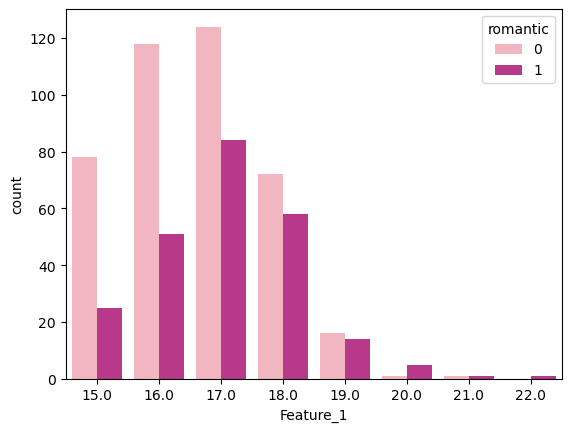

In [260]:
sns.countplot(data=data,hue="romantic",x="Feature_1",palette="RdPu")
plt.show()

It clearly show that with incraese in age , proportion of no of people in relationship is increasing.

Relationship Model


Factors affecting Relationship

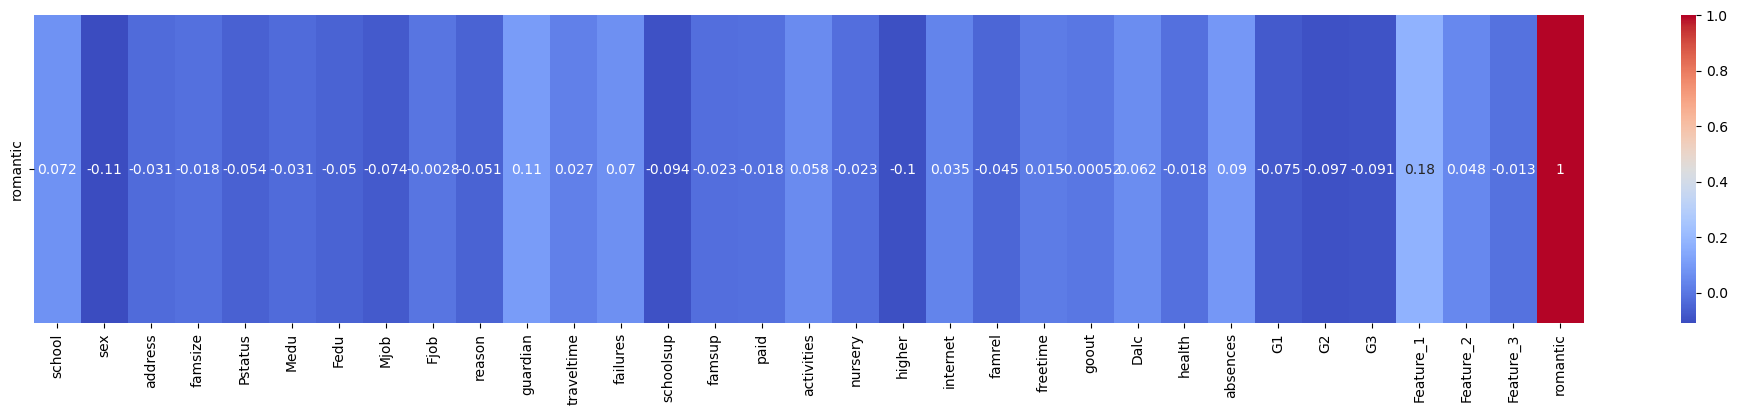

In [111]:
co1=data.corr(numeric_only=True)['romantic']
plt.figure(figsize=(25,4))
co1T = co1.to_frame().T
sns.heatmap(co1T,annot=True,cmap='coolwarm')
plt.show()

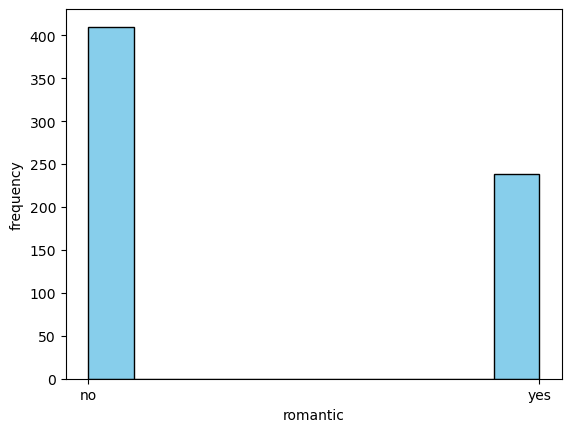

romantic
no     410
yes    239
Name: count, dtype: int64


In [105]:
plt.hist(data['romantic'], color='skyblue', edgecolor='black')
plt.xlabel('romantic')
plt.ylabel('frequency')
plt.show()
counts = data['romantic'].value_counts()
print(counts)

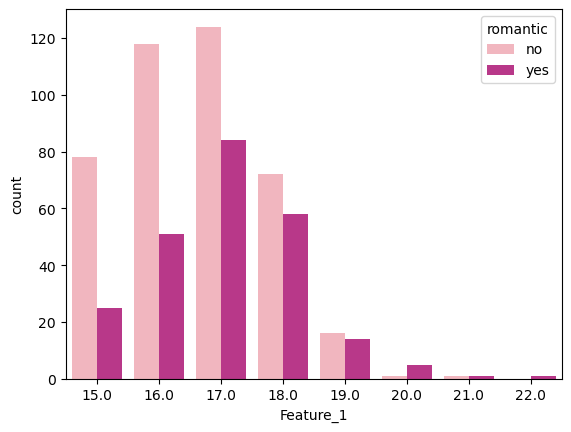

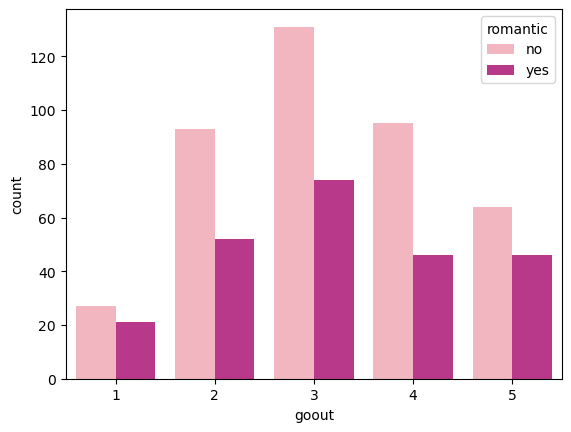

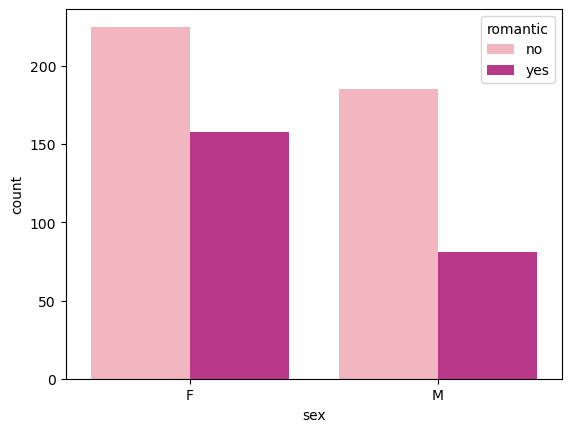

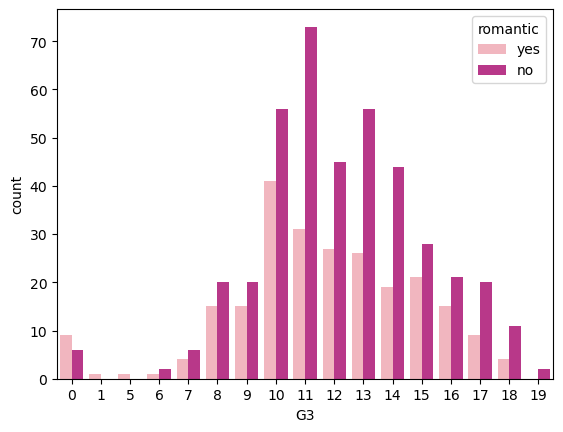

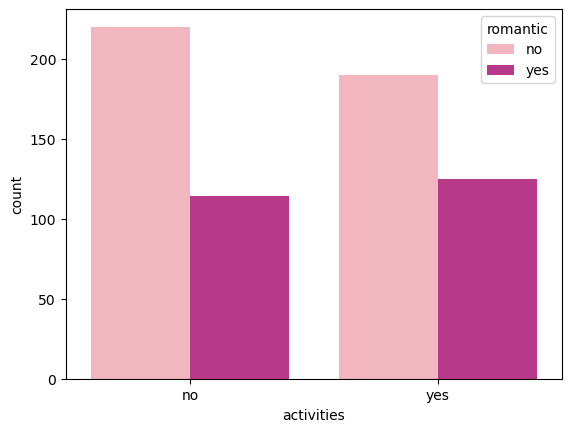

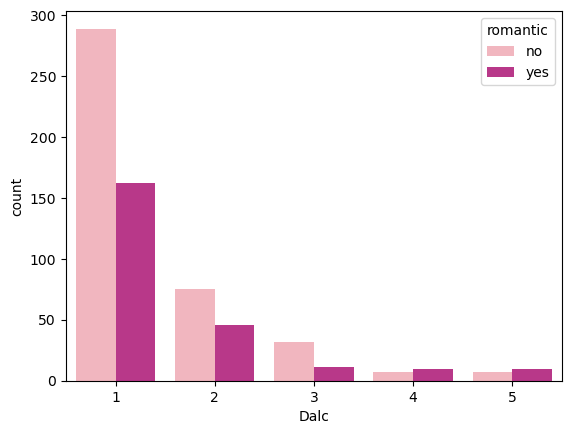

In [194]:
sns.countplot(data=data,hue="romantic",x="Feature_1",palette="RdPu")
plt.show()
sns.countplot(data=data,hue="romantic",x="goout",palette="RdPu")

plt.show()
sns.countplot(data=data,hue="romantic",x="sex",palette="RdPu")
plt.show()
sns.countplot(data=data,hue="romantic",x="G3",palette="RdPu")
plt.show()
sns.countplot(data=data,hue="romantic",x="activities",palette="RdPu")
plt.show()
sns.countplot(data=data,hue="romantic",x="Dalc",palette="RdPu")
plt.show()


Models

Libraries

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix


Categorical data is converted to numerical one.

In [113]:
from sklearn.preprocessing import LabelEncoder

#  convert all object (categorical) columns to numeric codes
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoder if  need to inverse transform later

Training and Testing set

In [613]:
X = data.select_dtypes(include='number')
if 'romantic' in X.columns:
    X = X.drop(columns=['romantic'])


y=data['romantic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

Decision Tree

Without class weight balancing

In [739]:
m11 = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=7, min_samples_leaf=15)
m11.fit(X_train, y_train)




DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=15,
                       random_state=100)

In [741]:
y_pred = m11.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6196319018404908

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       110
           1       0.43      0.49      0.46        53

    accuracy                           0.62       163
   macro avg       0.58      0.59      0.58       163
weighted avg       0.63      0.62      0.63       163


Confusion Matrix:
[[75 35]
 [27 26]]


Feature engineering 

In [723]:
df=data.copy()
df['grade_avg'] = df[['G1', 'G2', 'G3']].mean(axis=1)
df['failures_absences'] = df['failures'] * df['absences']
df['goout_Dalc'] = df['goout'] * df['Dalc']
df['parent_edu'] = df['Medu'] + df['Fedu']


features = ['grade_avg','failures_absences','goout_Dalc','Feature_1']

X=df[features]


y=df['romantic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [725]:
m1 = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=5, min_samples_leaf=12)
m1.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                       random_state=100)

In [727]:
y_pred = m1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5705521472392638

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.68       110
           1       0.35      0.38      0.36        53

    accuracy                           0.57       163
   macro avg       0.52      0.52      0.52       163
weighted avg       0.58      0.57      0.57       163


Confusion Matrix:
[[73 37]
 [33 20]]


By even feature engineering and class weight balanced , accuracy and F1 scores are not improved .It might be
because of lack of strong coorelation of these features with Relationship

Class weight balanced


In [732]:
X = data.select_dtypes(include='number')
if 'romantic' in X.columns:
    X = X.drop(columns=['romantic'])


y=data['romantic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
m1 = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=5, min_samples_leaf=12,class_weight="balanced")
m1.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_leaf=12, random_state=100)

In [734]:
y_pred = m1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.48466257668711654

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.42      0.52       110
           1       0.34      0.62      0.44        53

    accuracy                           0.48       163
   macro avg       0.52      0.52      0.48       163
weighted avg       0.58      0.48      0.50       163


Confusion Matrix:
[[46 64]
 [20 33]]


Random Forest

In [699]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=100)
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=100)

In [701]:
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5521472392638037

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       110
           1       0.33      0.36      0.34        53

    accuracy                           0.55       163
   macro avg       0.50      0.50      0.50       163
weighted avg       0.56      0.55      0.56       163


Confusion Matrix:
[[71 39]
 [34 19]]


Logestic Regression

In [573]:
from sklearn.model_selection import train_test_split


In [604]:
from sklearn.linear_model import LogisticRegression


Logestic Regression


In [703]:
#features = [ 'Feature_1','Fedu', 'Feature_3', 'Feature_2', 'Dalc', 'famsup', 'absences','paid','traveltime','famsize','freetime','address']

#X=data[features]

X = data.select_dtypes(include='number')
if 'romantic' in X.columns:
    X = X.drop(columns=['romantic'])
y=data['romantic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
lg = LogisticRegression(max_iter=2000)
lg.fit(X_train, y_train)


LogisticRegression(max_iter=2000)

In [705]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = lg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5950920245398773

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       104
           1       0.41      0.27      0.33        59

    accuracy                           0.60       163
   macro avg       0.53      0.53      0.52       163
weighted avg       0.57      0.60      0.57       163


Confusion Matrix:
[[81 23]
 [43 16]]


DECISION BOUNDARIES

FOR DECISION TREE

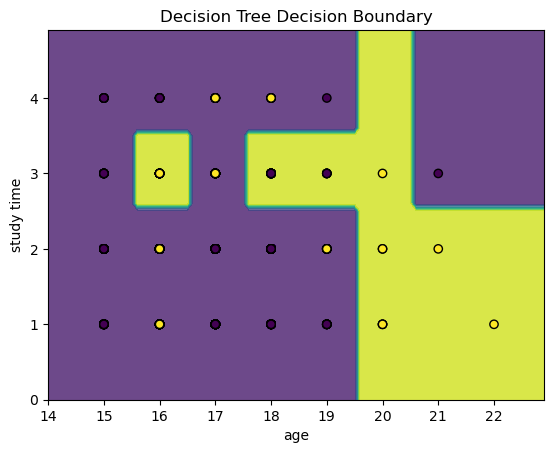

In [782]:
features = ['Feature_1','Feature_2']
X = data[features].values

y=data['romantic']
# Fit the logistic regression model
model = DecisionTreeClassifier()
model.fit(X, y)

# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('age')
plt.ylabel('study time')
plt.title('Decision Tree Decision Boundary')
plt.show()



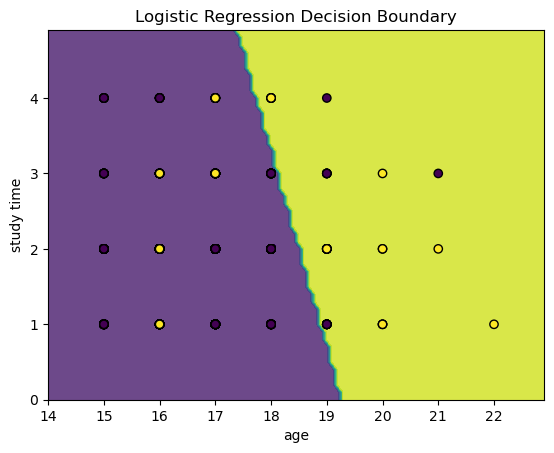

In [789]:
features = ['Feature_1','Feature_2']
X = data[features].values

y=data['romantic']
# Fit the logistic regression model
model =LogisticRegression()
model.fit(X, y)

# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('age')
plt.ylabel('study time')
plt.title('Logistic Regression Decision Boundary')
plt.show()


here the model will predict if any student fall in region yellow will be in relationship, otherwise if it is purple it will preict in 
not in relationship. here dots indicate what it actually represent

Global feature importance

Random Forest

In [221]:
import shap

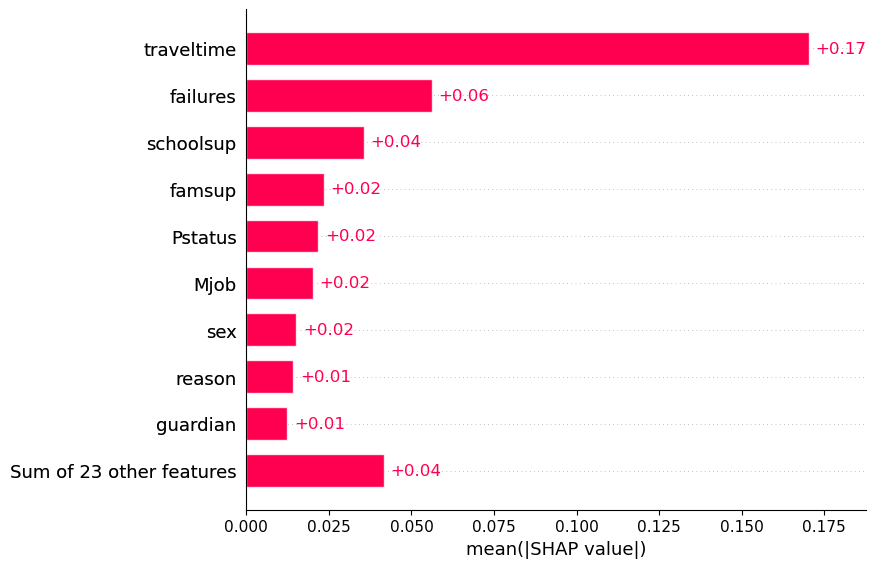

In [588]:
explainer = shap.TreeExplainer(rf)

shap_values = explainer(X) 
shap.plots.bar(shap_values[..., 0], clustering=None) 



Decision Tree


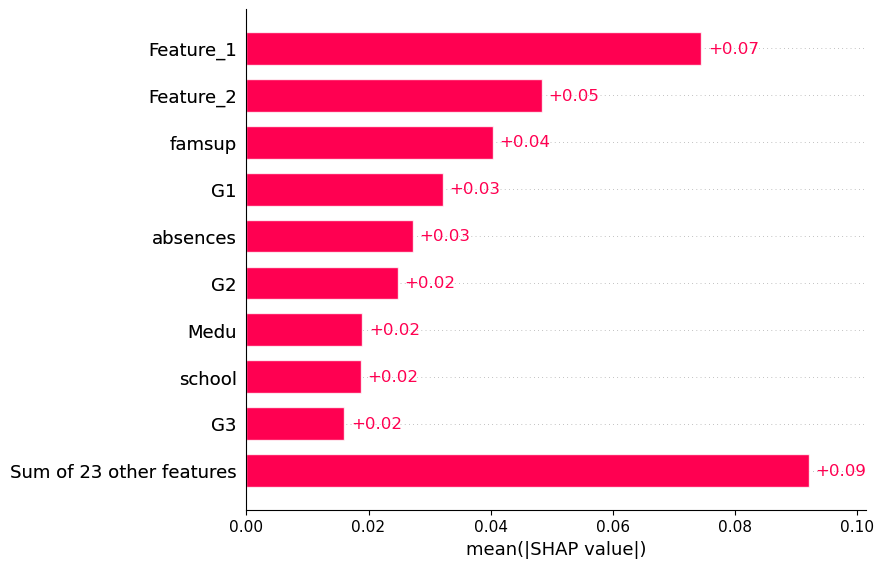

In [744]:
explainer = shap.TreeExplainer(m11)

shap_values = explainer(X) 
shap.plots.bar(shap_values[..., 0], clustering=None) 


FEATURE_1 which is age and study time has higher impact on relationship prediction than other factors